# Author: Abhilasha Dhole

## GRIP @ The Spark Foundation

## Data Science and Business Analytics Intern

#### Batch: GRIPDECEMBER23

### Task 1: PREDICTION USING SUPERVISED ML

#### Predicting the percentage of an student based on the no. of their study hours. This is a simple linear regression model which involves just two variables.

In [1]:
# Importing all required liabraries:

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing data from an ecternal link
url = "http://bit.ly/w-data"
ddf = pd.read_csv(url)
print(ddf)
print("Data is successfully imported.")

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86
Data is successfully imported.


### Exploratory Data Analysis

In [3]:
ddf.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
ddf.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
print(ddf.shape)
print("\nDataset has 25 rows and 2 columns.")

(25, 2)

Dataset has 25 rows and 2 columns.


In [7]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [8]:
ddf.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [9]:
ddf.isnull().sum()    # There is no null value present in dataset.

Hours     0
Scores    0
dtype: int64

### Data Visualization

#### Now we will plot our data points on 2D graph to see our dataset and find any relationship between data.

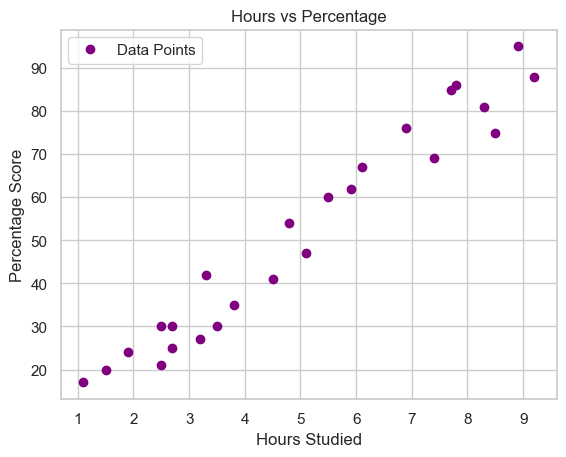

In [14]:
# Plotting the distribution of scores
ddf.plot(x = 'Hours', y = 'Scores', style = 'o', color = 'purple', label = 'Data Points')
sns.set(style = 'whitegrid')
plt.grid(True)
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

#### There is a positive linear relationship between the dependent and independent variables. It shows if the study hours increases then that students percentage score will also increases.

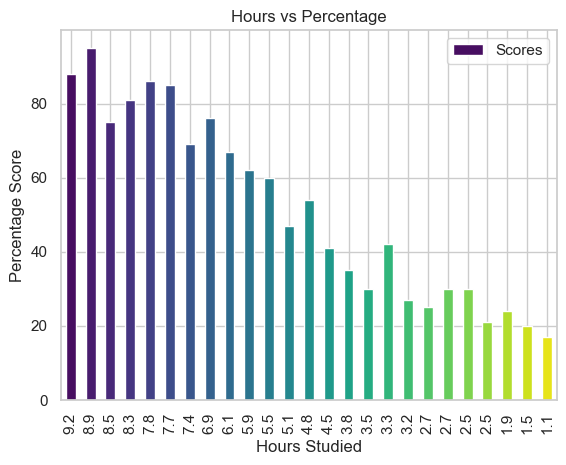

In [15]:
ddf.sort_values(['Hours'], axis = 0, ascending = [False], inplace = True)
colors = sns.color_palette("viridis", len(ddf))

ddf.plot.bar(x = "Hours", y = "Scores", color = colors)

plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

<Axes: >

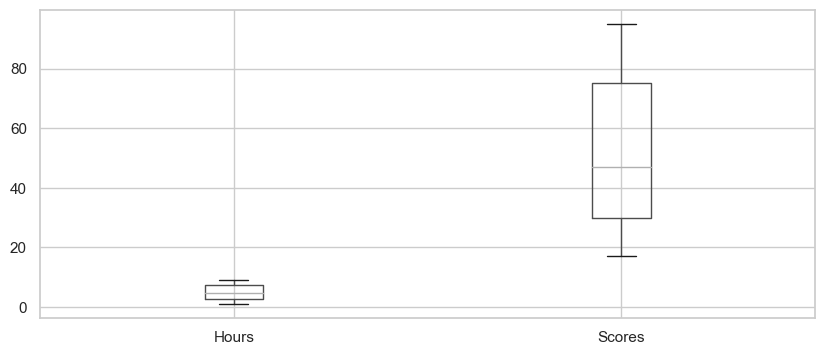

In [17]:
# Checking outliers using Boxplot
ddf.boxplot(figsize = (10,4))

In [18]:
print("There is no outliers in dataset.")

There is no outliers in dataset.


### Data Analysis

In [19]:
x = ddf.iloc[:,:-1].values
y = ddf.iloc[:, 1].values
# Next we will devide data into 'attributes'(inputs) and 'labels'(outputs).


In [23]:
# Then we have our attributes and labels, the next step is to split this data into training and test sets.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

###### The code uses the train_test_split function from the sklearn.model_selection module to split the dataset into training and testing sets. The input features are denoted as x, and correspnding labels are denoted as y. The test_size parameter is set to 0.2, indicating that 20% of the data will be reserved for testing, while remaining 80% will be used for training. The random_state parameter is set to 0, ensuring reproducibility by fixing the randome seed. After the execution of this code, the variable x_train, x_test, y_train and y_test will contain the training and testing subsets of the input features and labels,respectively. This seperation is crucial for assessing the performance of machine lerning models, as it allows training on one portion of the data and evaluating on another to gauge generalization capabilities.

In [24]:
#Time to tain our algorithm.
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)  #fitted the linear regression model and plotted in graphical representation.

LinearRegression()

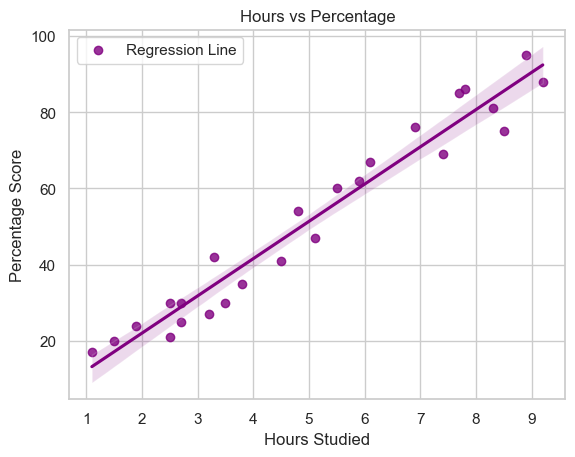

In [25]:
sns.regplot(x = 'Hours', y = 'Scores', data = ddf, scatter = True, color = 'purple', label = 'Regression Line')

plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.legend()
plt.show()

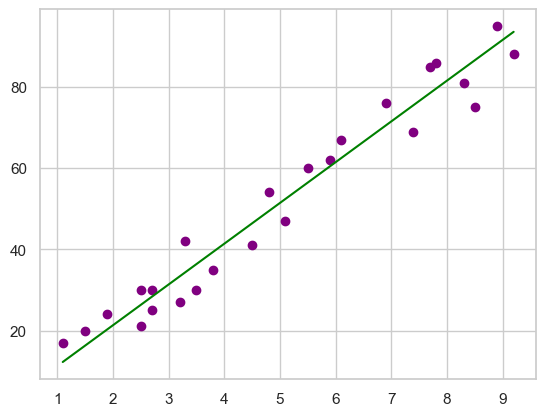

In [26]:
regression_line = model.coef_*x+model.intercept_

#scatter plot and regression line
plt.plot(x, y, 'o', color = 'purple')
plt.plot(x, regression_line, color = 'green');
plt.show()

### Testing and Prediction

In [27]:
print(x_test)   # Testing data in Hours

[[7.7]
 [8.5]
 [2.7]
 [3.3]
 [5.1]]


In [28]:
y_pred = model.predict(x_test)  # Predicting the scores
print(y_pred)

[78.50967226 86.54100719 28.31382894 34.33733014 52.40783373]


In [30]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("Comparison between Actual and Predicted Scores")
df

Comparison between Actual and Predicted Scores


,Actual,Predicted
0,85,78.509672
1,75,86.541007
2,30,28.313829
3,42,34.337330
4,47,52.407834


In [31]:
# Model accuracy rate
Accuracy_rate = model.score(x_train, y_train)
Accuracy_rate

0.9643124121561196

In [32]:
hours = 9.25
test = np.array([hours]) # Create 1D array
test = test. reshape(-1, 1) # Reshape to a 2D array with one column

own_pred = model.predict(test)
print("No. of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))
print("The predicted score if a student studies for 9.25 hrs/day is: ",own_pred)

No. of Hours = 9.25
Predicted Score = 94.07038369304554
The predicted score if a student studies for 9.25 hrs/day is:  [94.07038369]


#### Predicted score if a student studies for a 9.25 hrs/day is: 94.07

### Evaluating the model


In [34]:
from sklearn import metrics
import math
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = math.sqrt(MSE)
MAE = metrics.mean_absolute_error(y_test, y_pred)

print("The Mean Squared Error is:",MSE)
print("The Root Mean Squared Error is:",RMSE)
print("Mean Absolute Error is:",MAE)

The Mean Squared Error is: 53.22470983724605
The Root Mean Squared Error is: 7.2955267004683115
Mean Absolute Error is: 6.5576019184652266


In [35]:
print("R Squared Value is: ",metrics.r2_score(y_test, y_pred))

R Squared Value is:  0.8764973319165443


#### A higher R-squred value suggest a better fit of the model to the data. In this case, about 87.64% of the variability in the target variable is accounted for by the independent variables included in our model.